In [1]:
import gym   # all you have to do to import and use open ai gym!

In [2]:
env = gym.make('FrozenLake-v1',render_mode='human')  # we are going to use the FrozenLake enviornment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
print(env.observation_space.n)   # get number of states (here states and observations are same thing)
print(env.action_space.n)   # get number of actions (up down left right)

16
4


In [20]:
env.reset()  # reset enviornment to default state

0

In [21]:
action = env.action_space.sample()  # get a random action
state = env.observation_space.sample()  # get a random state

In [6]:
print(action)

1


In [22]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [23]:
env.render()   # render the GUI for the enviornment

In [10]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n # states
ACTIONS = env.action_space.n

In [11]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment if it gets stuck at certain point and keeps repeating the same cirle or loop

LEARNING_RATE = 0.81  # learning rate (at what speed is the data learning)
GAMMA = 0.96 # discount factor the more the value there the more is chances it to look for the future

In [16]:
epsilon = 0.9  # start with a 90% chance of picking a random action and 10% chance of picking a q table aquired value

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [17]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

In [18]:
import gym
import numpy as np
import time

RENDER = False # if you want to see training set to true


In [24]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001  # decrease epsilon value for slowly coverting the randomization to using q matrix
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.52198161e-01 1.14817585e-02 1.26004791e-02 1.26475140e-02]
 [1.35752222e-03 3.74201198e-03 2.14678984e-03 3.60497419e-01]
 [1.36004646e-03 1.05759533e-03 1.95381041e-03 2.77701428e-01]
 [4.56438693e-03 3.07261034e-03 1.84066442e-03 1.44729822e-01]
 [4.41752857e-01 6.76041767e-03 7.78116780e-03 1.36051750e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.31167908e-05 2.96030292e-05 1.10962902e-02 2.47856961e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.02891933e-03 8.06029781e-03 6.07398664e-03 4.66301177e-01]
 [1.85798352e-03 3.88750601e-01 4.43025046e-03 7.53476286e-03]
 [1.55201325e-01 1.42249207e-03 1.28552108e-03 7.15885638e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.05217930e-03 8.88490383e-02 7.81745801e-01 2.35402814e-02]
 [1.45906574e-01 9.83340924e-01 1.95098219e-01 2.07293678e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

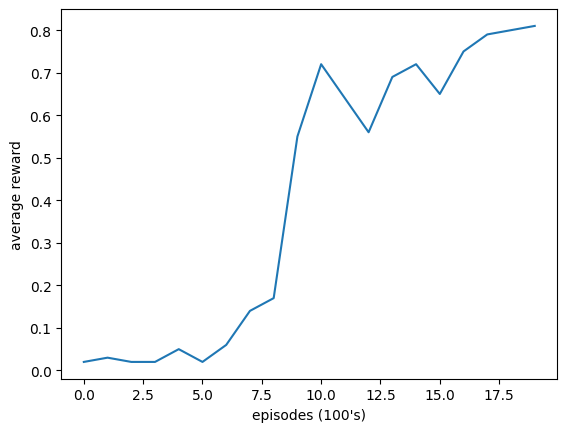

In [25]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()